In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('CompleteDataset.csv')
df.head()

/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/1254832226.py:10: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CompleteDataset.csv')


Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3          L. Suárez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  ...    RB  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  ...  61.0   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...  57.0   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png  ...  59.0   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...  64.0   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png  ...   NaN   

    RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 75 columns]

# Weekly assignment 4: machine learning (1/2)

### Data cleaning

In [2]:
df["Value"].describe()
df.dropna(inplace=True)

#  Select 7 variables with strong predictive value.

df_subset = df[['Dribbling','Agility','Finishing','Sliding tackle','Sprint speed','Interceptions']]
df_subset['Dribbling'] = df_subset['Dribbling'].astype('string').str[:2].astype(int)
df_subset['Agility'] = df_subset['Agility'].astype('string').str[:2].astype(int)
df_subset['Finishing'] = df_subset['Finishing'].astype('string').str[:2].astype(int)
df_subset['Sliding tackle'] = df_subset['Sliding tackle'].astype('string').str[:2].astype(int)
df_subset['Sprint speed'] = df_subset['Sprint speed'].astype('string').str[:2].astype(int)
df_subset['Interceptions'] = df_subset['Interceptions'].astype('string').str[:2].astype(int)

df_subset["Preferred Positions"] = df['Preferred Positions']
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dribbling            15746 non-null  int64 
 1   Agility              15746 non-null  int64 
 2   Finishing            15746 non-null  int64 
 3   Sliding tackle       15746 non-null  int64 
 4   Sprint speed         15746 non-null  int64 
 5   Interceptions        15746 non-null  int64 
 6   Preferred Positions  15746 non-null  object
dtypes: int64(6), object(1)
memory usage: 984.1+ KB


/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/2560631504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Dribbling'] = df_subset['Dribbling'].astype('string').str[:2].astype(int)
/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/2560631504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Agility'] = df_subset['Agility'].astype('string').str[:2].astype(int)
/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/2560631504.py:9: SettingW

### Exploratory data analysis

                Dribbling   Agility  Finishing  Sliding tackle  Sprint speed  \
Dribbling        1.000000  0.662824   0.704603       -0.279052      0.511421   
Agility          0.662824  1.000000   0.475173       -0.266122      0.641956   
Finishing        0.704603  0.475173   1.000000       -0.592455      0.348852   
Sliding tackle  -0.279052 -0.266122  -0.592455        1.000000     -0.244808   
Sprint speed     0.511421  0.641956   0.348852       -0.244808      1.000000   
Interceptions   -0.208996 -0.220344  -0.493260        0.898438     -0.243981   

                Interceptions  
Dribbling           -0.208996  
Agility             -0.220344  
Finishing           -0.493260  
Sliding tackle       0.898438  
Sprint speed        -0.243981  
Interceptions        1.000000  


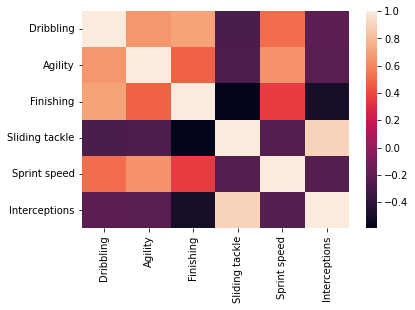

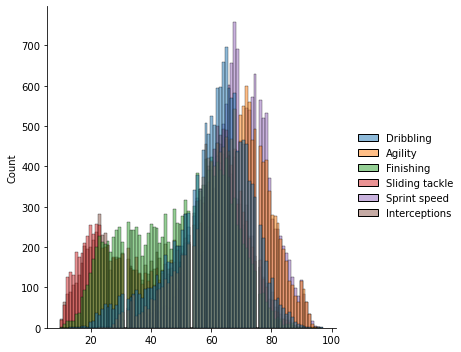

The median of graph is: 68.07608281468309
The mean of this graph is: 69.0
The standard deviation of graph is: 11.563570925034222


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


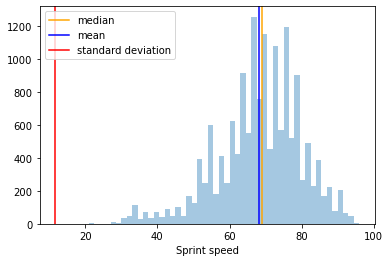

In [3]:
# Make a correlation matrix of the numerical variables
# Correlation matrix
correlation_matrix = df_subset.corr()
print (correlation_matrix)

# Heathmap
dataplot=sns.heatmap(df_subset.corr())
plt.show()

# Distplot
sns.displot(df_subset, kde=False)
plt.show()

# Summary statistics (measure of central tendency and variation, e.g., mean, median, standard deviation)
mean_speed = df_subset['Sprint speed'].mean()
median_speed = df_subset['Sprint speed'].median()
standard_deviation = np.std(df_subset['Sprint speed'])

print(f'The median of graph is: {mean_speed}')
print(f'The mean of this graph is: {median_speed}')
print(f'The standard deviation of graph is: {standard_deviation}')

graph = df_subset['Sprint speed']
sns.distplot(graph, kde=False) 
plt.axvline(median_speed, 0, 100, color='orange', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_speed, 0, 100, color='blue', label='mean') 
plt.axvline(standard_deviation, 0, 100, color='red', label='standard deviation') 
plt.legend()
plt.show()



### We can characterize the distribution as follows:
* Normality: The distribution is in a certain extent normal.
* Variation: There is wide range of variation, you also see some multiple values who are peaked.
* Modality: One one peak is nearby at the mean and the median. We can assume that the most players have 65 sprint speed.
* Skewness: The distribution in this case is skewed to the right.
* Outliers: There are couple of outliers, some players are really quick like Mbappe for instance and some players are not like central defenders (own knowledge).

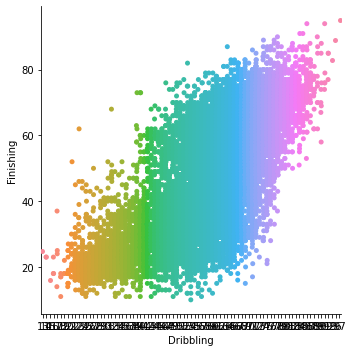

In [4]:
# 8. Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
# 9. Describe and interpret the results
sns.catplot(y="Finishing", x="Dribbling", data=df_subset)
plt.show()

### Description 

I chose the dribbling and finishing variables because they are highly correlated. The distribution is visible in the center of the catplot. The graph also shows that only a small number of players have high ratings for their dribbling and finishing, causing us to think that these players are effective attackers. The other outliers are sort of randomly distributed on the catplot, and based on their poor dribbling and finishing ratings, we can infer that they are defenders or defensive midfielders.

# Weekly assignment 5: machine learning (2/2)

### Predictive model

In [5]:
df_subset["Preferred Positions"] = df_subset["Preferred Positions"].str.split().explode("Preferred Positions")
df_subset["Preferred Positions"] = df_subset["Preferred Positions"].astype("string")
df_subset

/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/3649398124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Preferred Positions"] = df_subset["Preferred Positions"].str.split().explode("Preferred Positions")
/var/folders/zt/x520lc1x3p53j0ftdb9flb7w0000gn/T/ipykernel_47472/3649398124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Preferred Positions"] = df_subset["Preferred Positions"].astype("string")


Dribbling  Agility  Finishing  Sliding tackle  Sprint speed  \
0             91       89         94              23            91   
1             97       90         95              26            87   
2             96       96         89              33            90   
3             86       86         94              38            77   
5             85       78         91              19            83   
...          ...      ...        ...             ...           ...   
17974         29       45         15              49            60   
17975         44       40         40              38            22   
17978         37       60         47              14            51   
17979         41       58         32              47            58   
17980         23       49         20              43            49   

       Interceptions Preferred Positions  
0                 29                  ST  
1                 22                  LW  
2                 36                  RW  
3                 41                  LW  
5                 39                  ST  
...              ...                 ...  
17974             48                  RM  
17975             31                  LW  
17978             16                 CDM  
17979             46                  RM  
17980             38                  ST  

[15746 rows x 7 columns]

In [6]:
# Creating categorical numbers of the preferred positions
numerical = pd.get_dummies(df_subset["Preferred Positions"])
df_subset = pd.concat([df_subset, numerical], axis=1, join='inner')


df_subset["Preferred Positions"] = df_subset['Preferred Positions'].astype('category').cat.codes
df_subset["Preferred Positions"].describe()

df_subset

Dribbling  Agility  Finishing  Sliding tackle  Sprint speed  \
0             91       89         94              23            91   
1             97       90         95              26            87   
2             96       96         89              33            90   
3             86       86         94              38            77   
5             85       78         91              19            83   
...          ...      ...        ...             ...           ...   
17974         29       45         15              49            60   
17975         44       40         40              38            22   
17978         37       60         47              14            51   
17979         41       58         32              47            58   
17980         23       49         20              43            49   

       Interceptions  Preferred Positions  CAM  CB  CDM  ...  CM  LB  LM  LW  \
0                 29                   13    0   0    0  ...   0   0   0   0   
1                 22                    7    0   0    0  ...   0   0   0   1   
2                 36                   11    0   0    0  ...   0   0   0   0   
3                 41                    7    0   0    0  ...   0   0   0   1   
5                 39                   13    0   0    0  ...   0   0   0   0   
...              ...                  ...  ...  ..  ...  ...  ..  ..  ..  ..   
17974             48                   10    0   0    0  ...   0   0   0   0   
17975             31                    7    0   0    0  ...   0   0   0   1   
17978             16                    2    0   0    1  ...   0   0   0   0   
17979             46                   10    0   0    0  ...   0   0   0   0   
17980             38                   13    0   0    0  ...   0   0   0   0   

       LWB  RB  RM  RW  RWB  ST  
0        0   0   0   0    0   1  
1        0   0   0   0    0   0  
2        0   0   0   1    0   0  
3        0   0   0   0    0   0  
5        0   0   0   0    0   1  
...    ...  ..  ..  ..  ...  ..  
17974    0   0   1   0    0   0  
17975    0   0   0   0    0   0  
17978    0   0   0   0    0   0  
17979    0   0   1   0    0   0  
17980    0   0   0   0    0   1  

[15746 rows x 21 columns]

In [7]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

# Choose one of the following: k-nearest neighbor or random forest

X = df_subset[["Dribbling", "Agility", "Finishing", "Sliding tackle", "Sprint speed", "Interceptions","Preferred Positions"]] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale

count = df_subset['Preferred Positions'].value_counts() #Let's have a look at the 'genre' variable
count

y = df_subset['Preferred Positions'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [8]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

# Split the data set into a training and test set
# Train the model

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
"The K-nearest neighbor score is",knn.score(X_test, y_test) #calculate the fit on the test data

('The K-nearest neighbor score is', 0.3027095681625741)

### Explanation K-nearest neighbor algorithm
(Explain briefly in your own words how the algorithm works)

Het K dichtstbijzijnde buuralgoritme probeert datapunten te groeperen die dicht bij een gegeven K-means-cluster liggen. De datapunten zijn dus ingedeeld naar de relevante clusters.

In [9]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[166, 184,  59,   0,  28,   0,   1,   0,   0,   0,   0,   1,   0,
          0],
       [151, 257, 111,   3,  51,  10,   8,   0,   0,   0,   0,   0,   0,
          0],
       [103, 167, 110,   3,  85,  15,  13,   0,   0,   1,   0,   0,   0,
          0],
       [  8,  13,  12,   0,  20,   4,   3,   0,   0,   0,   0,   0,   0,
          0],
       [ 54, 127, 105,   7, 210,  51,  55,   5,   0,   4,   2,   0,   0,
          0],
       [ 19,  36,  41,   1, 114,  37,  74,   2,   1,   6,   1,   1,   0,
          0],
       [ 12,  25,  24,   3, 147,  66, 106,  11,   0,  23,  20,   2,   0,
          4],
       [  2,   4,   6,   2,  38,  18,  33,   3,   0,  10,  13,   0,   0,
          3],
       [  1,   1,   0,   0,   7,   5,   8,   1,   0,   5,   6,   1,   0,
          0],
       [  1,   3,   3,   0,  26,  34,  67,  12,   0,  79,  97,   8,   0,
         30],
       [  0,   1,   3,   0,  20,  23,  58,  11,   0, 106, 153,  16,   2,
         79],
       [  0,   3,   0,   0,   6,   5,  11, 

In [10]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['CAM','CB','CDM','CF','CM' ,'LB','LM','LW','LWB','RB','RM','RW','RWB','ST'], columns = ['CAM_p','CB_p','CDM_p','CF_p','CM_p' ,'LB_p','LM_p','LW_p','LWB_p','RB_p','RM_p','RW_p','RWB_p','ST_p']) 
conf_matrix

CAM_p  CB_p  CDM_p  CF_p  CM_p  LB_p  LM_p  LW_p  LWB_p  RB_p  RM_p  \
CAM    166   184     59     0    28     0     1     0      0     0     0   
CB     151   257    111     3    51    10     8     0      0     0     0   
CDM    103   167    110     3    85    15    13     0      0     1     0   
CF       8    13     12     0    20     4     3     0      0     0     0   
CM      54   127    105     7   210    51    55     5      0     4     2   
LB      19    36     41     1   114    37    74     2      1     6     1   
LM      12    25     24     3   147    66   106    11      0    23    20   
LW       2     4      6     2    38    18    33     3      0    10    13   
LWB      1     1      0     0     7     5     8     1      0     5     6   
RB       1     3      3     0    26    34    67    12      0    79    97   
RM       0     1      3     0    20    23    58    11      0   106   153   
RW       0     3      0     0     6     5    11     2      2    29    46   
RWB      1     1      0     0     1     1     1     0      0     3     8   
ST       0     1      2     0     1     4    16     8      1    77   128   

     RW_p  RWB_p  ST_p  
CAM     1      0     0  
CB      0      0     0  
CDM     0      0     0  
CF      0      0     0  
CM      0      0     0  
LB      1      0     0  
LM      2      0     4  
LW      0      0     3  
LWB     1      0     0  
RB      8      0    30  
RM     16      2    79  
RW      4      0    33  
RWB     3      1    15  
ST     22      2   304

### Conclusion & Results

The accuracy of the model is according to the K-nearest neighbor score 30%. The results of the confusion matrix vary, most positions are predicted 0 times correctly, but there are also positions who are predicted frequently correctly. The position 'CM' is for instance 210 times correctly predicted.


##### Positie CAM_____________

$recall = \frac{166}{439} = 0.38$

$precision = \frac{166}{518} = 0.32$


##### Positie CB_____________

$recall = \frac{257}{591} = 0.38$

$precision = \frac{257}{823} = 0.32$

##### Positie CDM_____________

$recall = \frac{110}{497} = 0.22$

$precision = \frac{110}{476} = 0.23$


##### Positie CF_____________

$recall = \frac{0}{60} = 0.0$

$precision = \frac{0}{19} = 0.0$

##### Positie CM_____________

$recall = \frac{210}{620} = 0.34$

$precision = \frac{210}{754} = 0.28$

##### Positie LB_____________

$recall = \frac{37}{333} = 0.11$

$precision = \frac{37}{273} = 0.14$

##### Positie LM_____________

$recall = \frac{106}{443} = 0.24$

$precision = \frac{106}{454} = 0.23$


##### Positie LW_____________

$recall = \frac{3}{132} = 0.8$

$precision = \frac{3}{55} = 1.93$


##### Positie LWB_____________

$recall = \frac{0}{35} = 0.0$

$precision = \frac{0}{4} = 0.0$

##### Positie RB_____________

$recall = \frac{79}{360} = 0.22$

$precision = \frac{79}{343} = 0.23$


##### Positie RM_____________

$recall = \frac{153}{472} = 0.32$

$precision = \frac{153}{474} = 0.32$

##### Positie RW_____________

$recall = \frac{4}{141} = 0.03$

$precision = \frac{4}{343} = 0.01$

##### Positie RWB_____________

$recall = \frac{1}{35} = 0.11$

$precision = \frac{1}{5} = 0.8$

##### Positie ST_____________

$recall = \frac{304}{566} = 0.O1$

$precision = \frac{304}{458} = 0.01$



In [11]:
# These are the codes for the calculation of the recall and precision for each position.

# CAM_______________________________________

# Sum of the recall
result = conf_matrix.iloc[0].sum()
print (result)
result = conf_matrix["CAM_p"].sum()
print (result)

# Calculation
CAM_Recall = 166/conf_matrix.iloc[0].sum()
CAM_Precision = 166/conf_matrix["CAM_p"].sum()

# Result Recall
print (round(CAM_Recall,2))
# Result Precision
print (round(CAM_Precision,2))


# CB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[1].sum()
print (result)
result = conf_matrix["CB_p"].sum()
print (result)

# Calculation
CB_Recall = 257/conf_matrix.iloc[1].sum()
CB_Precision = 257/conf_matrix["CB_p"].sum()

# Result Recall
print (round(CB_Recall,2))
# Result Precision
print (round(CB_Precision,2))

# CDM_______________________________________

# Sum of the recall
result = conf_matrix.iloc[2].sum()
print (result)
result = conf_matrix["CDM_p"].sum()
print (result)

# Calculation
CDM_Recall = 110/conf_matrix.iloc[2].sum()
CDM_Precision = 110/conf_matrix["CDM_p"].sum()

# Result Recall
print (round(CDM_Recall,2))
# Result Precision
print (round(CDM_Precision,2))

# CF_______________________________________

# Sum of the recall
result = conf_matrix.iloc[3].sum()
print (result)
result = conf_matrix["CF_p"].sum()
print (result)

# Calculation
CF_Recall = 0/conf_matrix.iloc[3].sum()
CF_Precision = 0/conf_matrix["CF_p"].sum()

# Result Recall
print (round(CF_Recall,2))
# Result Precision
print (round(CF_Precision,2))

# CM_______________________________________

# Sum of the recall
result = conf_matrix.iloc[4].sum()
print (result)
result = conf_matrix["CM_p"].sum()
print (result)

# Calculation
CM_Recall = 210/conf_matrix.iloc[4].sum()
CM_Precision = 210/conf_matrix["CM_p"].sum()

# Result Recall
print (round(CM_Recall,2))
# Result Precision
print (round(CM_Precision,2))

# LB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[5].sum()
print (result)
result = conf_matrix["LB_p"].sum()
print (result)

# Calculation
LB_Recall = 37/conf_matrix.iloc[5].sum()
LB_Precision = 37/conf_matrix["LB_p"].sum()

# Result Recall
print (round(LB_Recall,2))
# Result Precision
print (round(LB_Precision,2))

# LM_______________________________________

# Sum of the recall
result = conf_matrix.iloc[6].sum()
print (result)
result = conf_matrix["LM_p"].sum()
print (result)

# Calculation
LM_Recall = 106/conf_matrix.iloc[6].sum()
LM_Precision = 106/conf_matrix["LM_p"].sum()

# Result Recall
print (round(LM_Recall,2))
# Result Precision
print (round(LM_Precision,2))

# LW_______________________________________

# Sum of the recall
result = conf_matrix.iloc[7].sum()
print (result)
result = conf_matrix["LW_p"].sum()
print (result)

# Calculation
LW_Recall = 106/conf_matrix.iloc[7].sum()
LW_Precision = 106/conf_matrix["LW_p"].sum()

# Result Recall
print (round(LW_Recall,2))
# Result Precision
print (round(LW_Precision,2))

# LWB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[8].sum()
print (result)
result = conf_matrix["LWB_p"].sum()
print (result)

# Calculation
LWB_Recall = 0/conf_matrix.iloc[8].sum()
LWB_Precision = 0/conf_matrix["LWB_p"].sum()

# Result Recall
print (round(LWB_Recall,2))
# Result Precision
print (round(LWB_Precision,2))


# RB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[9].sum()
print (result)
result = conf_matrix["RB_p"].sum()
print (result)

# Calculation
RB_Recall = 79/conf_matrix.iloc[9].sum()
RB_Precision = 79/conf_matrix["RB_p"].sum()

# Result Recall
print (round(RB_Recall,2))
# Result Precision
print (round(RB_Precision,2))

# RM_______________________________________

# Sum of the recall
result = conf_matrix.iloc[10].sum()
print (result)
result = conf_matrix["RM_p"].sum()
print (result)

# Calculation
RM_Recall = 153/conf_matrix.iloc[10].sum()
RM_Precision = 153/conf_matrix["RM_p"].sum()

# Result Recall
print (round(RM_Recall,2))
# Result Precision
print (round(RM_Precision,2))


# RB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[11].sum()
print (result)
result = conf_matrix["RB_p"].sum()
print (result)

# Calculation
RB_Recall = 4/conf_matrix.iloc[11].sum()
RB_Precision = 4/conf_matrix["RB_p"].sum()

# Result Recall
print (round(RB_Recall,2))
# Result Precision
print (round(RB_Precision,2))

# RWB_______________________________________

# Sum of the recall
result = conf_matrix.iloc[12].sum()
print (result)
result = conf_matrix["RWB_p"].sum()
print (result)

# Calculation
RWB_Recall = 4/conf_matrix.iloc[12].sum()
RWB_Precision = 4/conf_matrix["RWB_p"].sum()

# Result Recall
print (round(RWB_Recall,2))
# Result Precision
print (round(RWB_Precision,2))

# ST_______________________________________

# Sum of the recall
result = conf_matrix.iloc[13].sum()
print (result)
result = conf_matrix["ST_p"].sum()
print (result)

# Calculation
ST_Recall = 4/conf_matrix.iloc[13].sum()
ST_Precision = 4/conf_matrix["ST_p"].sum()

# Result Recall
print (round(ST_Recall,2))
# Result Precision
print (round(ST_Precision,2))

439
518
0.38
0.32
591
823
0.43
0.31
497
476
0.22
0.23
60
19
0.0
0.0
620
754
0.34
0.28
333
273
0.11
0.14
443
454
0.24
0.23
132
55
0.8
1.93
35
4
0.0
0.0
360
343
0.22
0.23
472
474
0.32
0.32
141
343
0.03
0.01
35
5
0.11
0.8
566
468
0.01
0.01
